# Introduction

[Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine)


[**Understanding Support Vector Machine(SVM) algorithm from examples** (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)


[**Support Vector Machine — Introduction to Machine Learning Algorithms** :
SVM model from scratch](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)


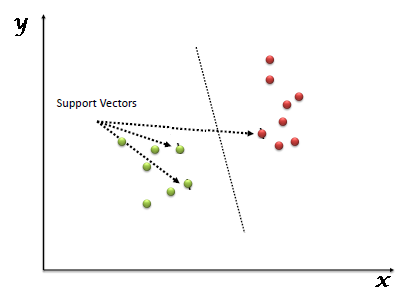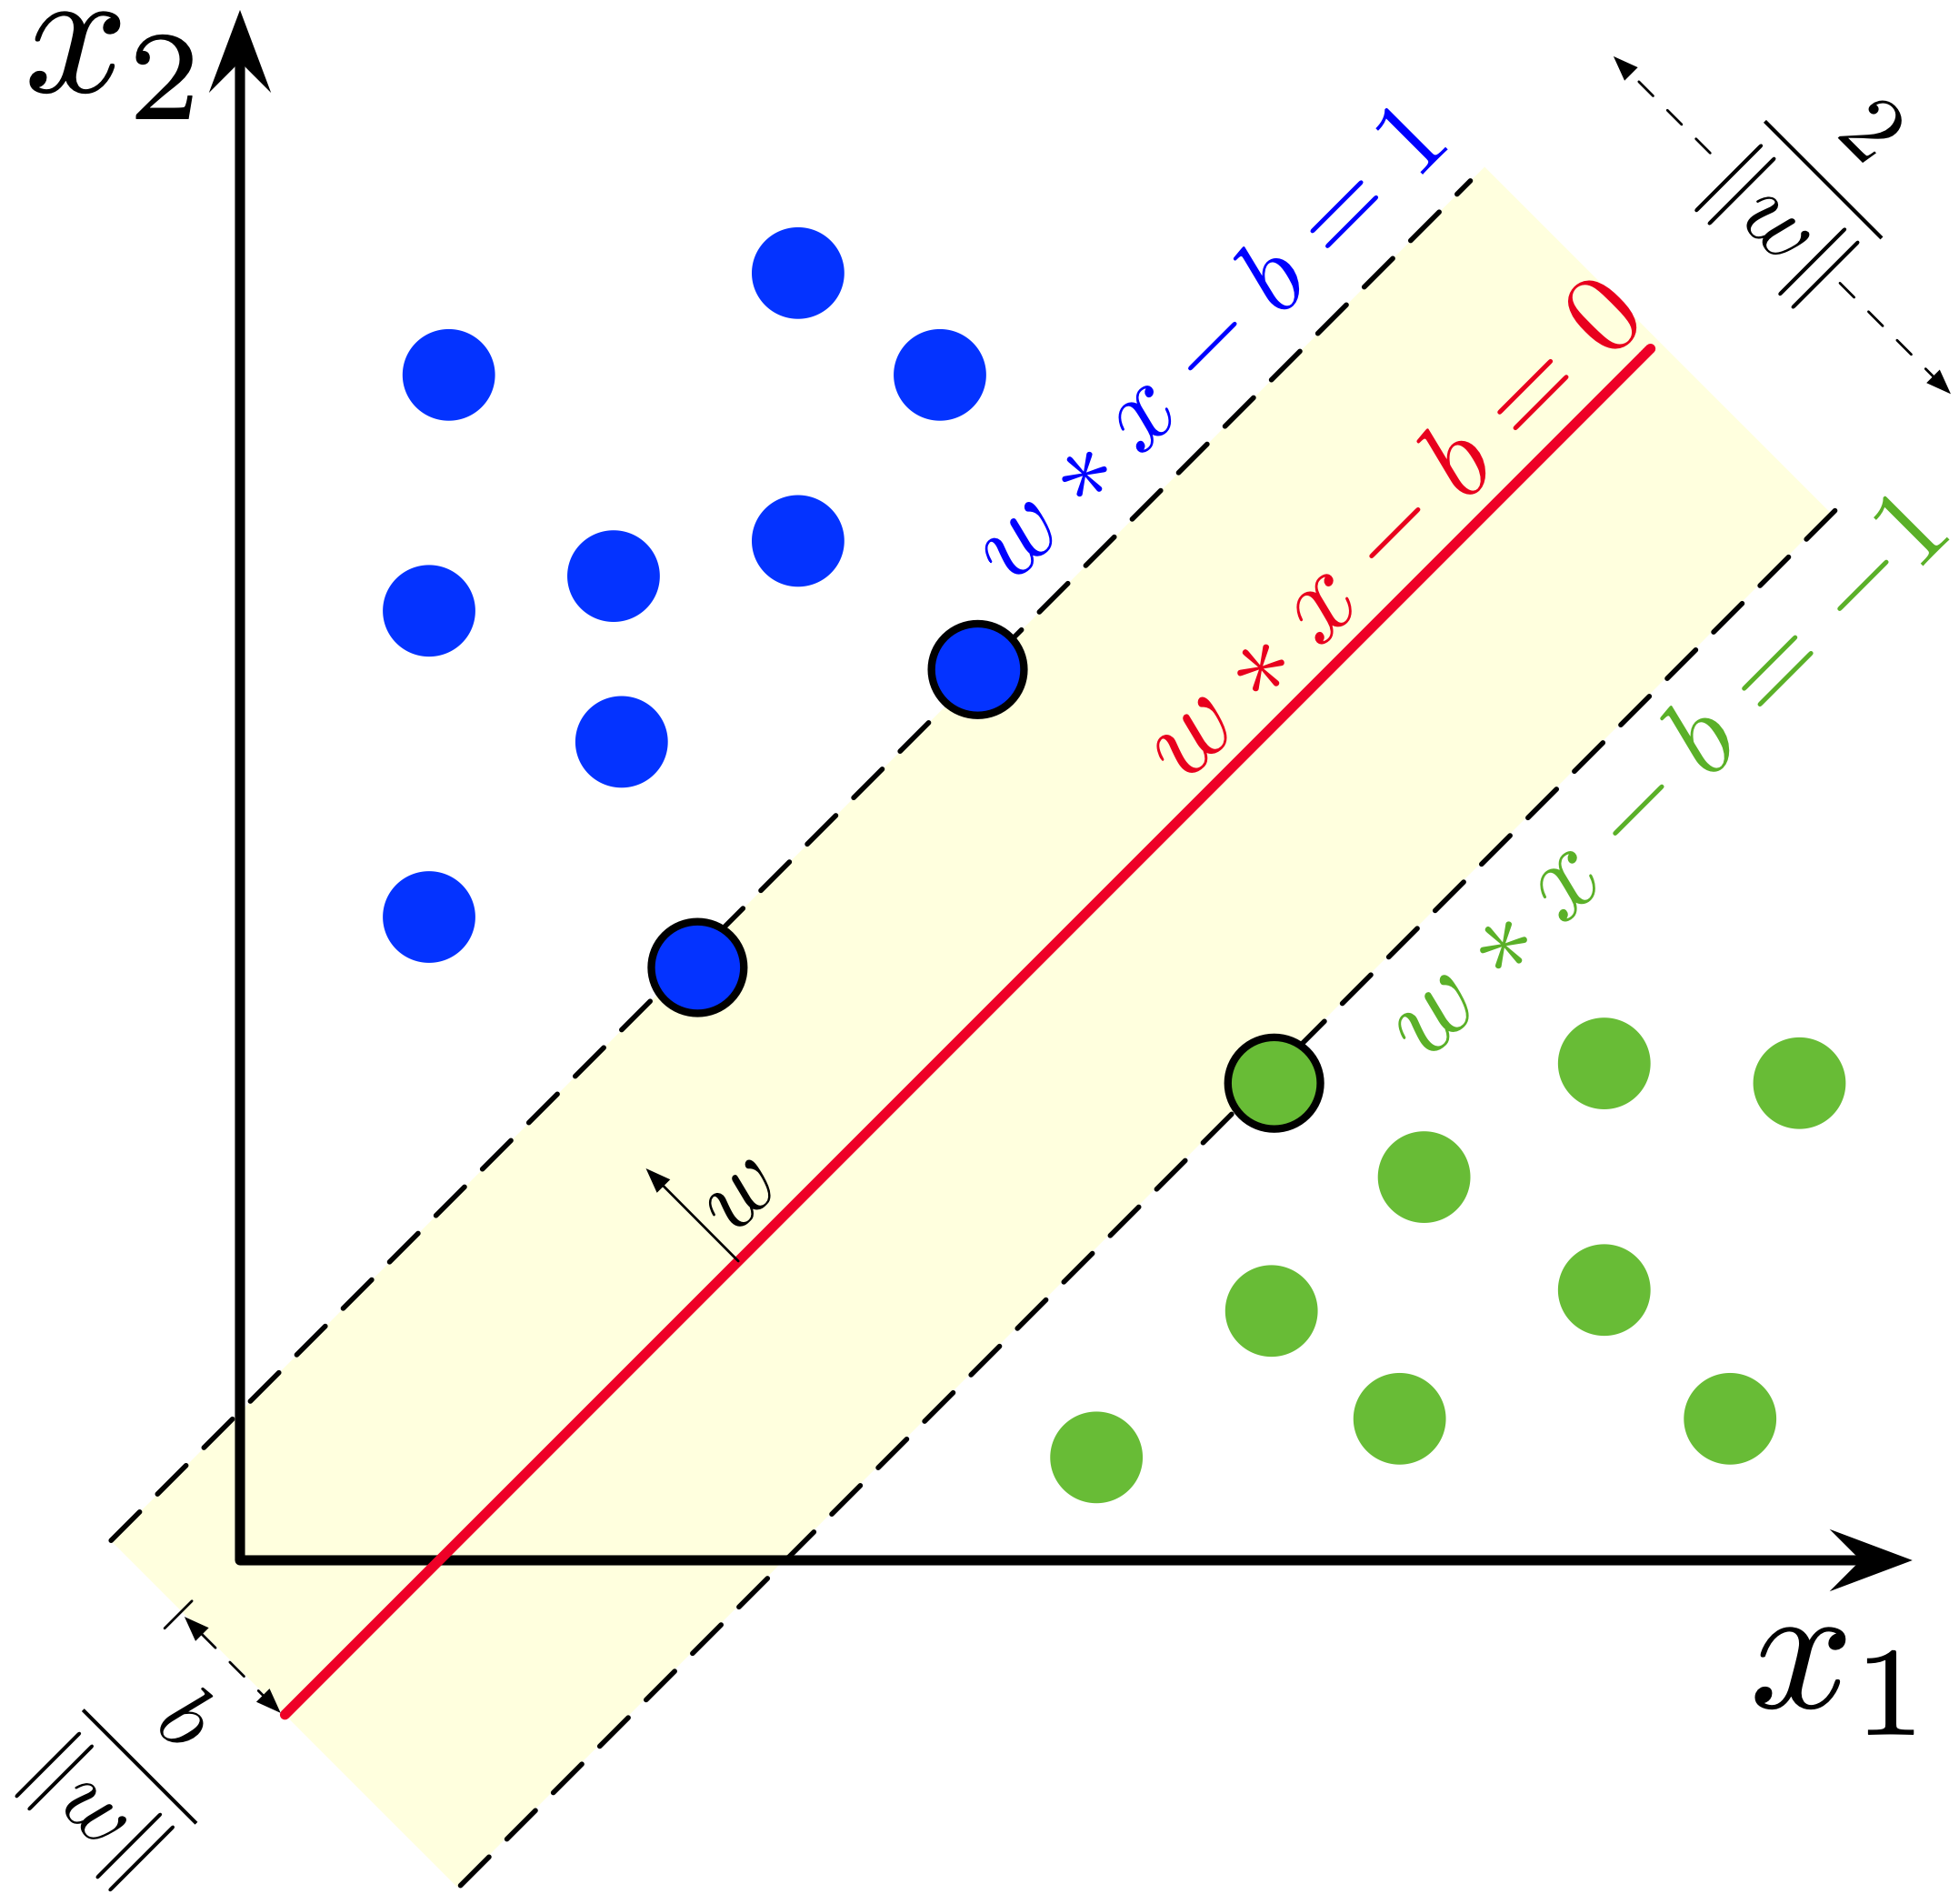Svm_separating_hyperplanes_(SVG).svg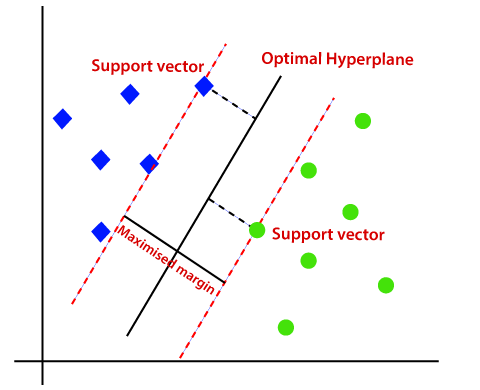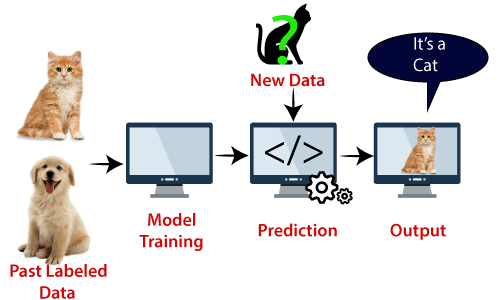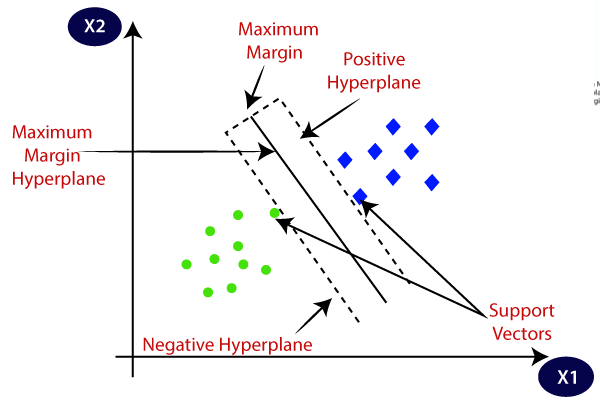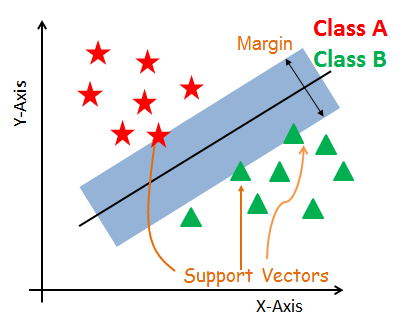

# How does SVM work?

xxxx.svg


xxxxx.svg


xxx.svg

\begin{aligned}&{\text{minimize }}{\frac {1}{n}}\sum _{i=1}^{n}\zeta _{i}+\lambda \|\mathbf {w} \|^{2}\\[0.5ex]&{\text{subject to }}y_{i}\left(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b\right)\geq 1-\zeta _{i}\,{\text{ and }}\,\zeta _{i}\geq 0,\,{\text{for all }}i.\end{aligned}

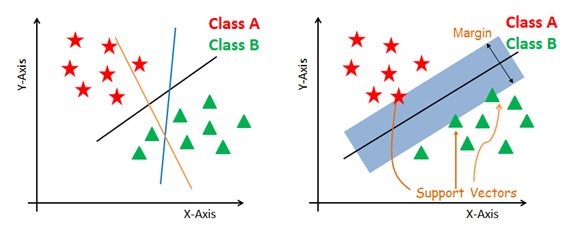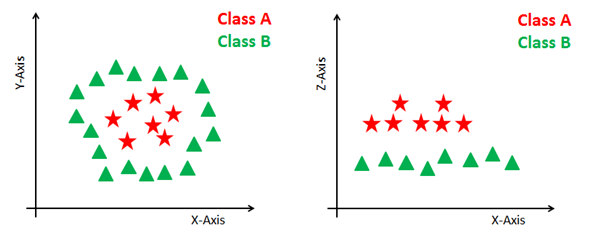

# implementation

In [44]:
#import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

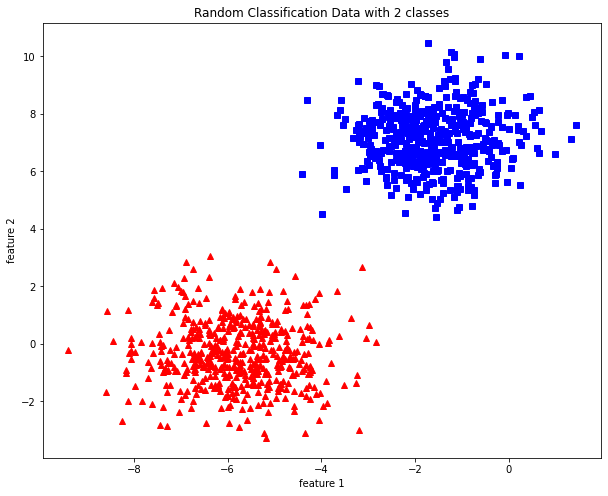

In [45]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=1001,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=22)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [46]:
## Shuffle and split the data into training and test set
xx, yy = shuffle(X,y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(xx, yy, train_size=0.9) # 90%

# to np
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [47]:
## Support Vector Machine 
import numpy as np

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(900,1)
train_f2 = train_f2.reshape(900,1)

w1 = np.zeros((900,1))
w2 = np.zeros((900,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    # print(epochs)
    count = 0
    for val in prod:
        if(val >= 1).all():
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

α(0.0001) is the learning rate and the regularization parameter λ is set to 1/epochs. Therefore, the regularizing value reduces the number of epochs increases.

In [48]:
from sklearn.metrics import accuracy_score

## Clip the weights 
index = list(range(101,900))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(101,1)
w2 = w2.reshape(101,1)

## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(101,1)
test_f2 = test_f2.reshape(101,1)

## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))

0.48514851485148514


In [49]:
## Comparing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0
